In [5]:
# define a state
from typing import TypedDict, Literal
class PortFolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float
    target_currency: Literal["eur", "inr"]
    total_eur: float

def cal_tatal(state: PortFolioState) -> PortFolioState:
    state["total_usd"] = state["amount_usd"] *1.08
    return state

def convert_to_inr(state: PortFolioState) -> PortFolioState:
    state["total_inr"] = state["total_usd"] * 85
    return state

def convert_to_eur(state: PortFolioState) -> PortFolioState:
    state["total_eur"] = state["total_usd"] * 0.85
    return state


def choose_conversion(state: PortFolioState) -> str:
    return state["target_currency"]




    

In [6]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortFolioState) # state pass as a parameter

builder.add_node("calculate_total", cal_tatal)
builder.add_node("convert_to_inr", convert_to_inr)
builder.add_node("convert_to_eur", convert_to_eur)

builder.add_edge(START, "calculate_total")
builder.add_conditional_edges(
    "calculate_total",
    choose_conversion,
    {
        "inr": "convert_to_inr",
        "eur": "convert_to_eur",
    },
)
builder.add_edge(["convert_to_inr","convert_to_eur"], END)


graph = builder.compile()



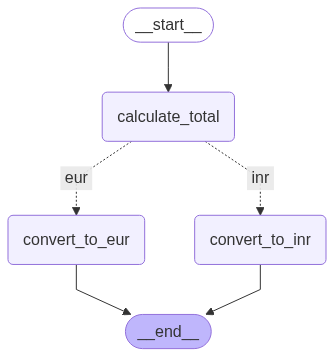

In [7]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))


In [9]:
graph.invoke({"amount_usd": 1000, "target_currency": "eur"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'target_currency': 'eur',
 'total_eur': 918.0}

In [10]:
graph.invoke({"amount_usd": 1000, "target_currency": "inr"})

{'amount_usd': 1000,
 'total_usd': 1080.0,
 'total_inr': 91800.0,
 'target_currency': 'inr'}